<a href="https://colab.research.google.com/github/sbhosale0701/CodeCluase_GoldenProject2-PersonalityPredictionSystem/blob/main/GoldenProject2PersonalityPredictionSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Golden Project 2-Personality Prediction System via CV Analysis**


In [ ]:
import pandas as pd
import numpy as np
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,log_loss
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [ ]:
train.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [ ]:
test.head()

,id,posts
0,1,Musical Linguistic Logic & Naturalist (tied)|...
1,2,'You: hello :) Stranger: hii You: how are you ...
2,3,'What worked for me was knowing that limerence...
3,4,'Please forget about him. You should definitel...
4,5,"'Ooh, ENTJ Celestia is actually an interesting..."


In [ ]:
print('Number of rows and columns in train data:{}' .format(train.shape))
print('Number of rows and columns in test data:{}' .format(test.shape))

Number of rows and columns in train data:(6506, 2)
Number of rows and columns in test data:(2169, 2)


In [ ]:
train.isnull().sum()

type     0
posts    0
dtype: int64

In [ ]:
test.isnull().sum()

id       0
posts    0
dtype: int64

In [ ]:
type_sum = train.groupby(['type']).count()
type_sum.sort_values('posts', ascending=False, inplace=True)
type_sum

,posts
type,
INFP,1386
INFJ,1100
INTP,960
INTJ,830
ENTP,530
ENFP,496
ISTP,255
ISFP,198
ENTJ,167


In [ ]:
train['word_count'] = train['posts'].apply(lambda x: len(str(x).split(" ")))
word_count = train.groupby('type').sum()
word_count.sort_values('word_count', ascending=False, inplace=True)
word_count

,word_count
type,
INFP,1766459
INFJ,1433173
INTP,1182968
INTJ,1021534
ENTP,657644
ENFP,640173
ISTP,309575
ISFP,228704
ENTJ,211562


In [ ]:
train = train.drop(['word_count'], axis=1)

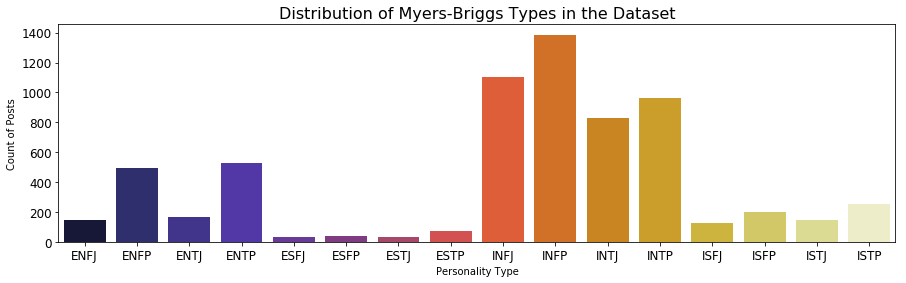

In [ ]:
dim = (15.0, 4.0)
fig, ax = plt.subplots(figsize=dim)
cmrmap = sns.color_palette('CMRmap', 16)
sns.set_palette(cmrmap)
sns.countplot(x='type', data=train,
              order=['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ',
                     'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP',
                     'ISTJ', 'ISTP'])
plt.title('Distribution of Myers-Briggs Types in the Dataset', fontsize=16)
plt.xlabel('Personality Type')
plt.ylabel('Count of Posts')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The 'ES' personality types have the least posts, whilst the 'IN' personalities have the most posts. This suggests that the data is imbalanced.

In [ ]:
train['Mind'] = train['type'].map(lambda x: 'Extroverted'
                                  if x[0] == 'E' else 'Introverted')
train['Energy'] = train['type'].map(lambda x: 'Intuitive'
                                    if x[1] == 'N' else 'Sensing')
train['Nature'] = train['type'].map(lambda x: 'Thinking'
                                    if x[2] == 'T' else 'Feeling')
train['Tactics'] = train['type'].map(lambda x: 'Judging'
                                     if x[3] == 'J' else 'Perceiving')

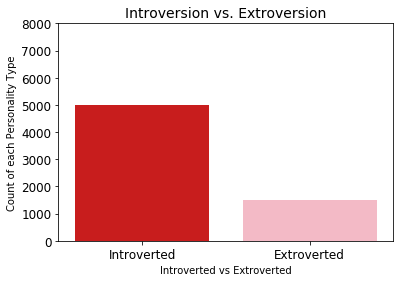

In [ ]:
IEcolors = sns.xkcd_palette(['red', 'soft pink'])
sns.set_palette(IEcolors)
sns.countplot(x='Mind', data=train, order=['Introverted', 'Extroverted'])
plt.ylim(0, 8000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Introverted vs Extroverted')
plt.ylabel('Count of each Personality Type')
plt.title('Introversion vs. Extroversion', fontsize=14)
plt.show()


There are more introverts who have written posts compare to extroverts. Now let's assess the most common words spoken by each.

In [ ]:

def generate_wordcloud(text, title):

    wordcloud = WordCloud(background_color='white').generate(text)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=40)
    plt.show()

In [ ]:
words_of_mind = train.groupby('Mind')['posts'].apply(' '.join).reset_index()

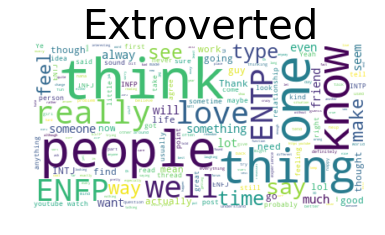

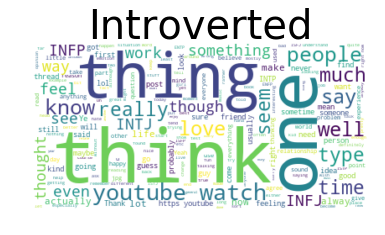

In [ ]:
for i, t in enumerate(words_of_mind['Mind']):
    text = words_of_mind.iloc[i,1]
    generate_wordcloud(text, t)

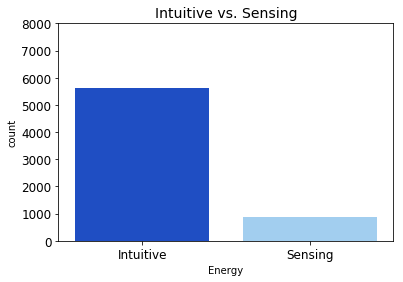

In [ ]:
NScolors = sns.xkcd_palette(['blue', 'light blue'])
sns.set_palette(NScolors)
sns.countplot(x='Energy', data=train, order=['Intuitive', 'Sensing'])
plt.title('Intuitive vs. Sensing', fontsize=14)
plt.ylim(0, 8000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

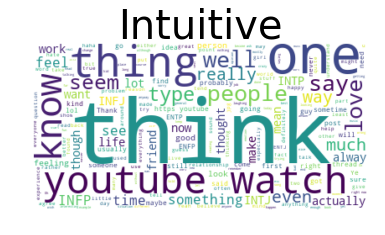

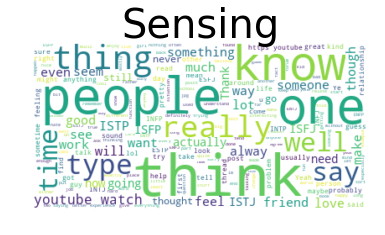

In [ ]:
words_of_energy = train.groupby('Energy')['posts'].apply(' '.join).reset_index()
for i, t in enumerate(words_of_energy['Energy']):
    text = words_of_energy.iloc[i, 1]
    generate_wordcloud(text, t)

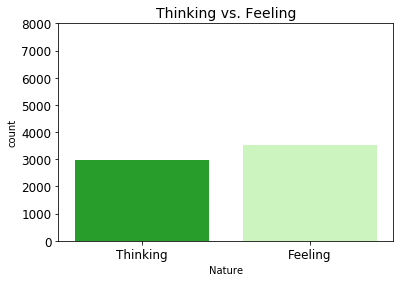

In [ ]:
TFcolors = sns.xkcd_palette(['green', 'pale green'])
sns.set_palette(TFcolors)
sns.countplot(x='Nature', data=train, order=['Thinking', 'Feeling'])
plt.title('Thinking vs. Feeling', fontsize=14)
plt.ylim(0, 8000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

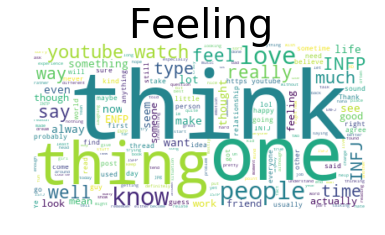

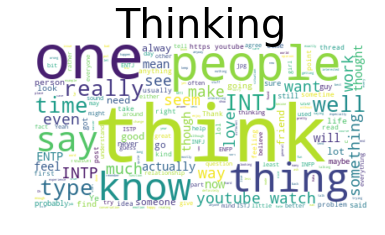

In [ ]:
words_of_nature = train.groupby('Nature')['posts'].apply(' '.join).reset_index()
for i, t in enumerate(words_of_nature['Nature']):
    text = words_of_nature.iloc[i, 1]
    generate_wordcloud(text, t)

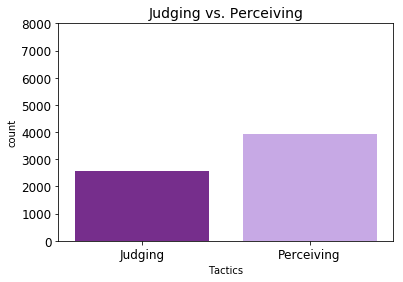

In [ ]:
JPcolors = sns.xkcd_palette(['purple', 'lavender'])
sns.set_palette(JPcolors)
sns.countplot(x='Tactics', data=train, order=['Judging', 'Perceiving'])
plt.title('Judging vs. Perceiving', fontsize=14)
plt.ylim(0, 8000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

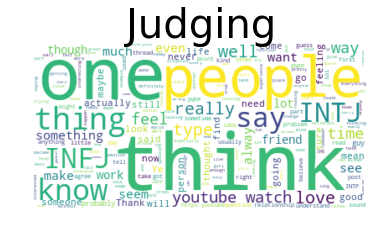

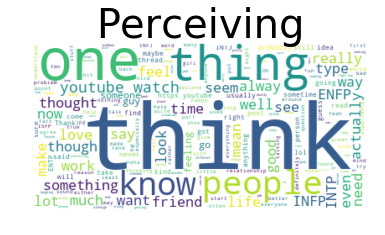

In [ ]:
words_of_tactics = train.groupby('Tactics')['posts'].apply(' '.join).reset_index()
for i, t in enumerate(words_of_tactics['Tactics']):
    text = words_of_tactics.iloc[i, 1]
    generate_wordcloud(text, t)

In [ ]:
def remove_delimiters (post):
    new = post.replace('|||',' ')
    return ' '.join(new.split())

train['posts'] = train['posts'].apply(remove_delimiters)
test['posts'] = test['posts'].apply(remove_delimiters)

In [ ]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
train['posts'] = train['posts'].replace(to_replace = pattern_url, value = subs_url, regex = True)
test['posts'] = test['posts'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [ ]:
train['posts'] = train['posts'].str.lower()

test['posts'] = test['posts'].str.lower()

In [ ]:
def remove_punctuation(post):
    punc_numbers = string.punctuation + '0123456789'
    return ''.join([l for l in post if l not in punc_numbers])

train['posts'] = train['posts'].apply(remove_punctuation)

test['posts'] = test['posts'].apply(remove_punctuation)

In [ ]:
train.head()

,type,posts,Mind,Energy,Nature,Tactics
0,INFJ,urlweb urlweb enfp and intj moments urlweb spo...,Introverted,Intuitive,Feeling,Judging
1,ENTP,im finding the lack of me in these posts very ...,Extroverted,Intuitive,Thinking,Perceiving
2,INTP,good one urlweb of course to which i say i kn...,Introverted,Intuitive,Thinking,Perceiving
3,INTJ,dear intp i enjoyed our conversation the other...,Introverted,Intuitive,Thinking,Judging
4,ENTJ,youre fired thats another silly misconception ...,Extroverted,Intuitive,Thinking,Judging


In [ ]:
lemmatizer = WordNetLemmatizer()
train['lemma'] = [' '.join([lemmatizer.lemmatize(word) for word in text.split(' ')])for text in train['posts']]
test['lemma'] = [' '.join([lemmatizer.lemmatize(word) for word in text.split(' ')])for text in test['posts']]

In [ ]:
train.head()

,type,posts,Mind,Energy,Nature,Tactics,lemma
0,INFJ,urlweb urlweb enfp and intj moments urlweb spo...,Introverted,Intuitive,Feeling,Judging,urlweb urlweb enfp and intj moment urlweb spor...
1,ENTP,im finding the lack of me in these posts very ...,Extroverted,Intuitive,Thinking,Perceiving,im finding the lack of me in these post very a...
2,INTP,good one urlweb of course to which i say i kn...,Introverted,Intuitive,Thinking,Perceiving,good one urlweb of course to which i say i kn...
3,INTJ,dear intp i enjoyed our conversation the other...,Introverted,Intuitive,Thinking,Judging,dear intp i enjoyed our conversation the other...
4,ENTJ,youre fired thats another silly misconception ...,Extroverted,Intuitive,Thinking,Judging,youre fired thats another silly misconception ...


In [ ]:
stop = stopwords.words('english')
train['stopwords'] = train['lemma'].apply(lambda x: len([x for x in x.split() if x in stop]))
train[['lemma','stopwords']].head()

,lemma,stopwords
0,urlweb urlweb enfp and intj moment urlweb spor...,257
1,im finding the lack of me in these post very a...,587
2,good one urlweb of course to which i say i kn...,402
3,dear intp i enjoyed our conversation the other...,529
4,youre fired thats another silly misconception ...,495


In [ ]:
stop = stopwords.words('english')
test['stopwords'] = test['lemma'].apply(lambda x: len([x for x in x.split() if x in stop]))
test[['lemma','stopwords']].head()

,lemma,stopwords
0,musical linguistic logic naturalist tied genu...,650
1,you hello stranger hii you how are you today ...,625
2,what worked for me wa knowing that limerence i...,793
3,please forget about him you should definitely ...,827
4,ooh entj celestia is actually an interesting t...,735


In [ ]:
def remove_stop_words(word):
    if word not in stop:
        return word
    else:
        return ''

In [ ]:
test['lemma_no_stop'] = [' '.join([remove_stop_words(word) for word in text.split(' ')])for text in test['lemma']]

In [ ]:
test.head()

,id,posts,lemma,stopwords,lemma_no_stop
0,1,musical linguistic logic naturalist tied genu...,musical linguistic logic naturalist tied genu...,650,musical linguistic logic naturalist tied genu...
1,2,you hello stranger hii you how are you today ...,you hello stranger hii you how are you today ...,625,hello stranger hii today stranger f st...
2,3,what worked for me was knowing that limerence ...,what worked for me wa knowing that limerence i...,793,worked wa knowing limerence bad thing...
3,4,please forget about him you should definitely ...,please forget about him you should definitely ...,827,please forget definitely save marriage ...
4,5,ooh entj celestia is actually an interesting t...,ooh entj celestia is actually an interesting t...,735,ooh entj celestia actually interesting thoug...


In [ ]:
train['E'] = train['type'].apply(lambda x: x[0] == 'E').astype('int')
train['N'] = train['type'].apply(lambda x: x[1] == 'N').astype('int')
train['T'] = train['type'].apply(lambda x: x[2] == 'T').astype('int')
train['J'] = train['type'].apply(lambda x: x[3] == 'J').astype('int')

In [ ]:
train.head()

,type,posts,Mind,Energy,Nature,Tactics,lemma,stopwords,E,N,T,J
0,INFJ,urlweb urlweb enfp and intj moments urlweb spo...,Introverted,Intuitive,Feeling,Judging,urlweb urlweb enfp and intj moment urlweb spor...,257,0,1,0,1
1,ENTP,im finding the lack of me in these posts very ...,Extroverted,Intuitive,Thinking,Perceiving,im finding the lack of me in these post very a...,587,1,1,1,0
2,INTP,good one urlweb of course to which i say i kn...,Introverted,Intuitive,Thinking,Perceiving,good one urlweb of course to which i say i kn...,402,0,1,1,0
3,INTJ,dear intp i enjoyed our conversation the other...,Introverted,Intuitive,Thinking,Judging,dear intp i enjoyed our conversation the other...,529,0,1,1,1
4,ENTJ,youre fired thats another silly misconception ...,Extroverted,Intuitive,Thinking,Judging,youre fired thats another silly misconception ...,495,1,1,1,1


In [ ]:
mind_df = train[['lemma','E']]

Vectorise the words with TfidfVectorizer

Several iterations of parameters were applied for each characteritic.

For Mind classification the best log loss result was achieved with below parameters
- max_features = 250 (this parmeter that was adjusted the most when tuning)
- min_df = 4 (had very little effect, when using the max_features the lower frequency words aren't selected)
- max_df = 0.5 (consistently produced the better results with a 0.5 setting)

In [ ]:
vect_mind = TfidfVectorizer(lowercase=True,
                            stop_words='english',
                            max_features=250,
                            min_df=4,
                            max_df=0.5
                           )

In [ ]:
vect_mind.fit(mind_df['lemma'])
X_count_mind = vect_mind.transform(mind_df['lemma'])

In [ ]:
X_count_mind.shape

(6506, 250)

In [ ]:
vect_mind.get_feature_names()

['able',
 'absolutely',
 'act',
 'advice',
 'age',
 'ago',
 'agree',
 'answer',
 'arent',
 'ask',
 'away',
 'awesome',
 'bad',
 'based',
 'believe',
 'big',
 'bit',
 'book',
 'called',
 'came',
 'care',
 'case',
 'cause',
 'certain',
 'change',
 'character',
 'child',
 'class',
 'close',
 'college',
 'common',
 'completely',
 'consider',
 'conversation',
 'cool',
 'couple',
 'course',
 'crazy',
 'dad',
 'deal',
 'definitely',
 'depends',
 'description',
 'difference',
 'dream',
 'easy',
 'emotion',
 'emotional',
 'end',
 'enfj',
 'enfp',
 'enfps',
 'enjoy',
 'entj',
 'entp',
 'entps',
 'esfj',
 'esfp',
 'especially',
 'estp',
 'exactly',
 'example',
 'experience',
 'eye',
 'face',
 'fact',
 'family',
 'far',
 'favorite',
 'fe',
 'felt',
 'female',
 'fi',
 'figure',
 'fit',
 'forum',
 'fun',
 'function',
 'funny',
 'game',
 'general',
 'generally',
 'getting',
 'girl',
 'god',
 'great',
 'group',
 'guess',
 'haha',
 'hand',
 'happy',
 'hate',
 'havent',
 'having',
 'head',
 'hear',
 'he

In [ ]:
X = X_count_mind
y = mind_df['E']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size =0.3,
                                                   random_state = 42)

In [ ]:
def scoring_function_log_loss(y_test, y_pred_test):
    return log_loss(y_test, y_pred_test)

In [ ]:
score_log_loss = make_scorer(scoring_function_log_loss, greater_is_better = False)

In [ ]:
def tune_LogReg_model(X_train, y_train):
    C_list = [0.001, 0.01, 0.1, 0.5, 0.75, 1, 5, 10, 25, 100]
    penalty_list = ['l1','l2']

    score = make_scorer(scoring_function_log_loss, greater_is_better = False)

    logreg = LogisticRegression()

    parameters = {'C':C_list,
                  'penalty': penalty_list}
    tune = GridSearchCV(logreg, parameters, scoring = score)
    tune.fit(X_train,y_train)

    return tune

In [ ]:
best_mind_model = tune_LogReg_model(X_train, y_train)

In [ ]:
best_mind_model.best_params_

{'C': 1, 'penalty': 'l1'}

In [ ]:
mind_model = LogisticRegression(C=best_mind_model.best_params_['C'], penalty = best_mind_model.best_params_['penalty'])
mind_model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_train = mind_model.predict(X_train)

In [ ]:
accuracy_score(y_train, y_pred_train)

0.8623188405797102

In [ ]:
y_pred_test = mind_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_test)

0.8698770491803278

In [ ]:
confusion_matrix(y_train, y_pred_train)

array([[3323,  155],
       [ 472,  604]])

In [ ]:
confusion_matrix(y_test, y_pred_test)

array([[1448,   72],
       [ 182,  250]])

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.88      0.96      0.91      3478
           1       0.80      0.56      0.66      1076

    accuracy                           0.86      4554
   macro avg       0.84      0.76      0.79      4554
weighted avg       0.86      0.86      0.85      4554



In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1520
           1       0.78      0.58      0.66       432

    accuracy                           0.87      1952
   macro avg       0.83      0.77      0.79      1952
weighted avg       0.86      0.87      0.86      1952



In [ ]:
log_loss(y_train, y_pred_train)

4.755365994117408

In [ ]:
log_loss(y_test, y_pred_test)

4.494316995554451

In [ ]:
mind_log_loss = cross_val_score(mind_model, X, y, scoring=score_log_loss,cv=4,)
print('Log Loss %2f' %(-1 * mind_log_loss.mean()))

mind_acc = cross_val_score(mind_model, X, y, scoring='accuracy',cv=4,)
print('Accuracy %2f' %(mind_acc.mean()))

Log Loss 4.873407
Accuracy 0.858901


In [ ]:
energy_df = train[['lemma','N']]

In [ ]:
vect_energy = TfidfVectorizer(lowercase=True,
                            stop_words='english',
                            max_features=195,
                            min_df=4,
                            max_df=0.5
                           )
vect_energy.fit(energy_df['lemma'])
X_count_energy = vect_energy.transform(energy_df['lemma'])

X_count_energy.shape

vect_energy.get_feature_names()

['able',
 'advice',
 'ago',
 'agree',
 'answer',
 'arent',
 'ask',
 'away',
 'awesome',
 'bad',
 'based',
 'believe',
 'big',
 'bit',
 'book',
 'came',
 'care',
 'case',
 'certain',
 'change',
 'character',
 'child',
 'class',
 'close',
 'completely',
 'conversation',
 'cool',
 'course',
 'crazy',
 'definitely',
 'dream',
 'emotion',
 'emotional',
 'end',
 'enfj',
 'enfp',
 'enjoy',
 'entj',
 'entp',
 'esfj',
 'especially',
 'estp',
 'exactly',
 'example',
 'experience',
 'eye',
 'face',
 'fact',
 'family',
 'far',
 'favorite',
 'fe',
 'felt',
 'female',
 'fi',
 'fit',
 'forum',
 'fun',
 'function',
 'funny',
 'game',
 'general',
 'getting',
 'girl',
 'god',
 'great',
 'group',
 'guess',
 'haha',
 'happy',
 'hate',
 'havent',
 'having',
 'head',
 'hear',
 'hey',
 'hi',
 'high',
 'home',
 'hope',
 'hour',
 'human',
 'important',
 'infj',
 'infjs',
 'infp',
 'infps',
 'interested',
 'interesting',
 'intj',
 'intjs',
 'intp',
 'intps',
 'isfj',
 'isfp',
 'isnt',
 'issue',
 'istj',
 'istp'

In [ ]:
X = X_count_energy
y = energy_df['N']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size =0.3,
                                                   random_state = 42)

In [ ]:
best_energy_model = tune_LogReg_model(X_train, y_train)

In [ ]:
best_energy_model.best_params_

{'C': 5, 'penalty': 'l1'}

In [ ]:
energy_model = LogisticRegression(C=best_energy_model.best_params_['C'], penalty = best_energy_model.best_params_['penalty'])
energy_model.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_train = energy_model.predict(X_train)

accuracy_score(y_train, y_pred_train)

0.9088713219148001

In [ ]:
y_pred_test = energy_model.predict(X_test)

accuracy_score(y_test, y_pred_test)

0.8980532786885246

In [ ]:
confusion_matrix(y_train, y_pred_train)

array([[ 315,  322],
       [  93, 3824]])

In [ ]:
confusion_matrix(y_test, y_pred_test)

array([[ 108,  149],
       [  50, 1645]])

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.77      0.49      0.60       637
           1       0.92      0.98      0.95      3917

    accuracy                           0.91      4554
   macro avg       0.85      0.74      0.78      4554
weighted avg       0.90      0.91      0.90      4554



In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.68      0.42      0.52       257
           1       0.92      0.97      0.94      1695

    accuracy                           0.90      1952
   macro avg       0.80      0.70      0.73      1952
weighted avg       0.89      0.90      0.89      1952



In [ ]:
log_loss(y_train, y_pred_train)

3.1475295727405492

In [ ]:
log_loss(y_test, y_pred_test)

3.5211760464161506

In [ ]:
energy_log_loss = cross_val_score(energy_model, X, y, scoring=score_log_loss,cv=4)
print('Log Loss %2f' %(-1 * energy_log_loss.mean()))

energy_acc = cross_val_score(energy_model, X, y, scoring='accuracy',cv=4,)
print('Accuracy %2f' %(energy_acc.mean()))

Log Loss 3.594178
Accuracy 0.895940


In [ ]:
nature_df = train[['lemma','T']]

In [ ]:
vect_nature = TfidfVectorizer(lowercase=True,
                            stop_words='english',
                            max_features=3900,
                            min_df=4,
                            max_df=0.5
                            #ngram_range=(3,3)
                           )
vect_nature.fit(nature_df['lemma'])
X_count_nature = vect_nature.transform(nature_df['lemma'])

X_count_nature.shape

vect_nature.get_feature_names()

['ability',
 'able',
 'abroad',
 'absolute',
 'absolutely',
 'absorbed',
 'abstract',
 'absurd',
 'abuse',
 'abusive',
 'academic',
 'accent',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'access',
 'accident',
 'accidentally',
 'accomplish',
 'accomplished',
 'according',
 'account',
 'accuracy',
 'accurate',
 'accurately',
 'accused',
 'achieve',
 'achievement',
 'acknowledge',
 'acquaintance',
 'act',
 'acted',
 'acting',
 'action',
 'active',
 'actively',
 'activity',
 'actor',
 'actual',
 'ad',
 'adam',
 'adapt',
 'add',
 'added',
 'addicted',
 'addiction',
 'adding',
 'addition',
 'address',
 'adhd',
 'admire',
 'admit',
 'admittedly',
 'adorable',
 'adore',
 'adult',
 'advance',
 'advanced',
 'advantage',
 'adventure',
 'adventurous',
 'advice',
 'advise',
 'advocate',
 'aesthetic',
 'affect',
 'affected',
 'affection',
 'affectionate',
 'affirmation',
 'afford',
 'afraid',
 'afternoon',
 'age',
 'agenda',
 'aggressive',
 'agnostic',
 'ago',
 'agree',
 'a

In [ ]:
X = X_count_nature
y = nature_df['T']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size =0.3,
                                                   random_state = 42)

In [ ]:
best_nature_model = tune_LogReg_model(X_train, y_train)

In [ ]:
best_nature_model.best_params_

{'C': 0.75, 'penalty': 'l2'}

In [ ]:
nature_model = LogisticRegression(C=best_nature_model.best_params_['C'], penalty = best_nature_model.best_params_['penalty'])
nature_model.fit(X_train, y_train)

LogisticRegression(C=0.75, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_train = nature_model.predict(X_train)

accuracy_score(y_train, y_pred_train)

0.9112867808519982

In [ ]:
y_pred_test = nature_model.predict(X_test)

accuracy_score(y_test, y_pred_test)

0.8524590163934426

In [ ]:
confusion_matrix(y_train, y_pred_train)

array([[2288,  183],
       [ 221, 1862]])

In [ ]:
confusion_matrix(y_test, y_pred_test)

array([[905, 142],
       [146, 759]])

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2471
           1       0.91      0.89      0.90      2083

    accuracy                           0.91      4554
   macro avg       0.91      0.91      0.91      4554
weighted avg       0.91      0.91      0.91      4554



In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1047
           1       0.84      0.84      0.84       905

    accuracy                           0.85      1952
   macro avg       0.85      0.85      0.85      1952
weighted avg       0.85      0.85      0.85      1952



In [ ]:
log_loss(y_train, y_pred_train)

3.0640781708110767

In [ ]:
log_loss(y_test, y_pred_test)

5.095943209308077

In [ ]:
nature_log_loss = cross_val_score(nature_model, X, y, scoring=score_log_loss,cv=4,)
print('Log Loss %2f' %(-1 * nature_log_loss.mean()))

nature_acc = cross_val_score(nature_model, X, y, scoring='accuracy',cv=4,)
print('Accuracy %2f' %(nature_acc.mean()))

Log Loss 4.889440
Accuracy 0.858438


In [ ]:
tactics_df = train[['lemma','J']]

In [ ]:
vect_tactics = TfidfVectorizer(lowercase=True,
                            stop_words='english',
                            max_features=260,
                            min_df=4,
                            max_df=0.5
                           )
vect_tactics.fit(tactics_df['lemma'])
X_count_tactics = vect_tactics.transform(tactics_df['lemma'])

X_count_tactics.shape

vect_tactics.get_feature_names()

['able',
 'absolutely',
 'act',
 'advice',
 'age',
 'ago',
 'agree',
 'answer',
 'arent',
 'ask',
 'away',
 'awesome',
 'bad',
 'based',
 'basically',
 'believe',
 'big',
 'bit',
 'book',
 'called',
 'came',
 'care',
 'case',
 'cause',
 'certain',
 'change',
 'character',
 'child',
 'class',
 'close',
 'college',
 'common',
 'completely',
 'consider',
 'conversation',
 'cool',
 'couple',
 'course',
 'crazy',
 'dad',
 'deal',
 'definitely',
 'depends',
 'description',
 'difference',
 'difficult',
 'dream',
 'easy',
 'emotion',
 'emotional',
 'end',
 'enfj',
 'enfp',
 'enfps',
 'enjoy',
 'entj',
 'entp',
 'entps',
 'esfj',
 'esfp',
 'especially',
 'estj',
 'estp',
 'exactly',
 'example',
 'experience',
 'eye',
 'face',
 'fact',
 'family',
 'far',
 'favorite',
 'fe',
 'felt',
 'female',
 'fi',
 'figure',
 'fit',
 'forum',
 'fun',
 'function',
 'funny',
 'game',
 'general',
 'generally',
 'getting',
 'girl',
 'god',
 'great',
 'group',
 'guess',
 'haha',
 'hand',
 'happy',
 'hate',
 'haven

In [ ]:
X = X_count_tactics
y = tactics_df['J']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size =0.3,
                                                   random_state = 42)

In [ ]:
best_tactics_model = tune_LogReg_model(X_train, y_train)

In [ ]:
best_tactics_model.best_params_

{'C': 0.75, 'penalty': 'l1'}

In [ ]:
tactics_model = LogisticRegression(C=best_tactics_model.best_params_['C'], penalty = best_tactics_model.best_params_['penalty'])
tactics_model.fit(X_train, y_train)

LogisticRegression(C=0.75, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_train = tactics_model.predict(X_train)

accuracy_score(y_train, y_pred_train)

0.8192797540623628

In [ ]:
y_pred_test = tactics_model.predict(X_test)

accuracy_score(y_test, y_pred_test)

0.8217213114754098

In [ ]:
confusion_matrix(y_train, y_pred_train)

array([[2447,  287],
       [ 536, 1284]])

In [ ]:
confusion_matrix(y_test, y_pred_test)

array([[1075,  123],
       [ 225,  529]])

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      2734
           1       0.82      0.71      0.76      1820

    accuracy                           0.82      4554
   macro avg       0.82      0.80      0.81      4554
weighted avg       0.82      0.82      0.82      4554



In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1198
           1       0.81      0.70      0.75       754

    accuracy                           0.82      1952
   macro avg       0.82      0.80      0.81      1952
weighted avg       0.82      0.82      0.82      1952



In [ ]:
log_loss(y_train, y_pred_train)

6.241906556318393

In [ ]:
log_loss(y_test, y_pred_test)

6.157578143397967

In [ ]:
tactics_log_loss = cross_val_score(tactics_model, X, y, scoring=score_log_loss,cv=4,)
print('Log Loss %2f' %(-1 * tactics_log_loss.mean()))

tactics_acc = cross_val_score(tactics_model, X, y, scoring='accuracy',cv=4,)
print('Accuracy %2f' %(tactics_acc.mean()))

Log Loss 6.561587
Accuracy 0.810024




| Model               | Mind Log Loss | Energy Log Loss | Nature Log Loss | Tactics Log Loss | Average Log Loss | Kaggle Score |
|---------------------|---------------|-----------------|-----------------|------------------|------------------|--------------|
| Logistic Regression |     4.87      |      3.59       |      4.89       |       6.56       |       4.98       |      5.01      |
| SVC                 |     4.87      |      4.28       |      5.52       |       6.56       |       5.31       |      5.18    |
| Random Forest       |     6.39      |      4.46       |      9.30       |      10.65       |       7.70       |      7.91      |
| Multinomial NB      |     7.59      |      4.54       |      6.67       |       9.73       |       7.13       |      6.42      |

In [ ]:
test.head()

,id,posts,lemma,stopwords,lemma_no_stop
0,1,musical linguistic logic naturalist tied genu...,musical linguistic logic naturalist tied genu...,650,musical linguistic logic naturalist tied genu...
1,2,you hello stranger hii you how are you today ...,you hello stranger hii you how are you today ...,625,hello stranger hii today stranger f st...
2,3,what worked for me was knowing that limerence ...,what worked for me wa knowing that limerence i...,793,worked wa knowing limerence bad thing...
3,4,please forget about him you should definitely ...,please forget about him you should definitely ...,827,please forget definitely save marriage ...
4,5,ooh entj celestia is actually an interesting t...,ooh entj celestia is actually an interesting t...,735,ooh entj celestia actually interesting thoug...


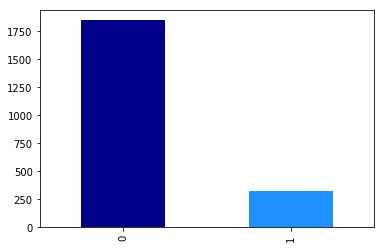

,id,E_pred
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,1
6,7,0
7,8,0
8,9,0
9,10,0


In [ ]:
pred_mind_count = vect_mind.transform(test['lemma_no_stop'])

pred_mind_count.shape

X = X_count_mind
y = mind_df['E']

final_mind_model = mind_model
final_mind_model.fit(X, y)

final_mind_predictions = final_mind_model.predict(pred_mind_count)

test['E_pred'] = final_mind_predictions

test.head()

pred_mind_df = test[['id', 'E_pred']]

pred_mind_df.head(10)

pred_mind_df.columns

pred_mind_df['E_pred'].value_counts().plot(kind = 'bar',color = ['darkblue','dodgerblue'])

#pred_mind_df




plt.show()

pred_mind_df.head(10)

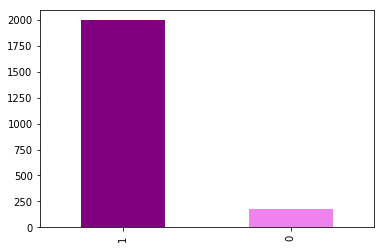

,id,N_pred
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,1
6,7,1
7,8,1
8,9,0
9,10,1


In [ ]:
pred_energy_count = vect_energy.transform(test['lemma_no_stop'])

pred_energy_count.shape

X = X_count_energy
y = energy_df['N']

final_energy_model = energy_model
final_energy_model.fit(X, y)

final_energy_predictions = final_energy_model.predict(pred_energy_count)

test['N_pred'] = final_energy_predictions

pred_energy_df = test[['id', 'N_pred']]

pred_energy_df['N_pred'].value_counts().plot(kind = 'bar', color = ['purple','violet'])
plt.show()

pred_energy_df.head(10)

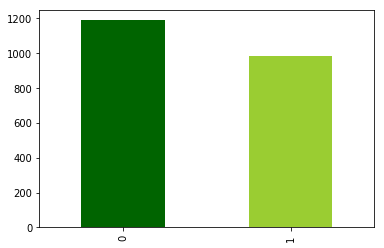

,id,T_pred
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,1
7,8,0
8,9,0
9,10,1


In [ ]:
pred_nature_count = vect_nature.transform(test['lemma_no_stop'])

pred_nature_count.shape

X = X_count_nature
y = nature_df['T']

final_nature_model = nature_model
final_nature_model.fit(X, y)

final_nature_predictions = final_nature_model.predict(pred_nature_count)

test['T_pred'] = final_nature_predictions

pred_nature_df = test[['id', 'T_pred']]

pred_nature_df['T_pred'].value_counts().plot(kind = 'bar', color = ['darkgreen','yellowgreen'])
plt.show()

pred_nature_df.head(10)

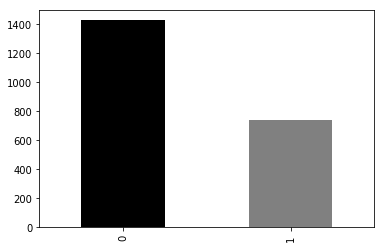

,id,J_pred
0,1,0
1,2,0
2,3,1
3,4,0
4,5,1
5,6,0
6,7,1
7,8,0
8,9,0
9,10,0


In [ ]:
pred_tactics_count = vect_tactics.transform(test['lemma_no_stop'])

pred_tactics_count.shape

X = X_count_tactics
y = tactics_df['J']

final_tactics_model = tactics_model
final_tactics_model.fit(X, y)

final_tactics_predictions = final_tactics_model.predict(pred_tactics_count)

test['J_pred'] = final_tactics_predictions

pred_tactics_df = test[['id', 'J_pred']]

pred_tactics_df['J_pred'].value_counts().plot(kind = 'bar', color = ['black','grey'])


plt.show()

pred_tactics_df.head(10)

In [ ]:
my_submission = pd.merge(pred_mind_df[['id','E_pred']], pred_energy_df[['id','N_pred']], how ='inner', on ='id')
my_submission = pd.merge(my_submission[['id','E_pred', 'N_pred']], pred_nature_df[['id','T_pred']], how ='inner', on ='id')
my_submission = pd.merge(my_submission[['id','E_pred', 'N_pred','T_pred']], pred_tactics_df[['id','J_pred']], how ='inner', on ='id')

In [ ]:
my_submission.head(10)

,id,E_pred,N_pred,T_pred,J_pred
0,1,0,1,0,0
1,2,0,1,0,0
2,3,0,1,0,1
3,4,0,1,0,0
4,5,0,1,0,1
5,6,1,1,0,0
6,7,0,1,1,1
7,8,0,1,0,0
8,9,0,0,0,0
9,10,0,1,1,0


In [ ]:
my_submission.rename(columns={'id':'id',
                            'E_pred':'mind',
                            'N_pred': 'energy',
                            'T_pred': 'nature',
                            'J_pred': 'tactics'
                             },
                 inplace=True)

my_submission.head()

,id,mind,energy,nature,tactics
0,1,0,1,0,0
1,2,0,1,0,0
2,3,0,1,0,1
3,4,0,1,0,0
4,5,0,1,0,1


In [ ]:
my_submission.to_csv('Classification_project_final_submission.csv', index=False)

In [ ]:
# Create column for the predictions of each of the 4 chracteristics
my_submission['Mind Pred'] = my_submission['mind'].map(lambda x: 'E' if x == 1 else 'I')
my_submission['Energy Pred'] = my_submission['energy'].map(lambda x: 'N' if x == 1 else 'S')
my_submission['Nature Pred'] = my_submission['nature'].map(lambda x: 'T' if x == 1 else 'F')
my_submission['Tactics Pred'] = my_submission['tactics'].map(lambda x: 'J' if x == 1 else 'P')

In [ ]:
my_submission.head()

,id,mind,energy,nature,tactics,Mind Pred,Energy Pred,Nature Pred,Tactics Pred
0,1,0,1,0,0,I,N,F,P
1,2,0,1,0,0,I,N,F,P
2,3,0,1,0,1,I,N,F,J
3,4,0,1,0,0,I,N,F,P
4,5,0,1,0,1,I,N,F,J


In [ ]:
my_submission['Personality Pred'] = my_submission['Mind Pred'] + my_submission['Energy Pred'] + my_submission['Nature Pred']+ my_submission['Tactics Pred']

In [ ]:
my_submission[['id','Personality Pred']].head()

,id,Personality Pred
0,1,INFP
1,2,INFP
2,3,INFJ
3,4,INFP
4,5,INFJ


In [ ]:
mbti_type = ['ENFJ','ENFP','ENTJ','ENTP','ESFJ','ESFP','ESTJ','ESTP','INFJ','INFP','INTJ','INTP','ISFJ','ISFP','ISTJ','ISTP']
global_p = [ 2.5, 8.1, 1.8, 3.2, 12.3, 8.5, 8.7, 4.3, 1.5, 4.4, 2.1, 3.3, 13.8, 8.8, 11.6, 5.4]

In [ ]:
global_types = {'Type':mbti_type,'Percentage':global_p}

In [ ]:
global_df = pd.DataFrame(global_types)
global_df

,Type,Percentage
0,ENFJ,2.5
1,ENFP,8.1
2,ENTJ,1.8
3,ENTP,3.2
4,ESFJ,12.3
5,ESFP,8.5
6,ESTJ,8.7
7,ESTP,4.3
8,INFJ,1.5
9,INFP,4.4


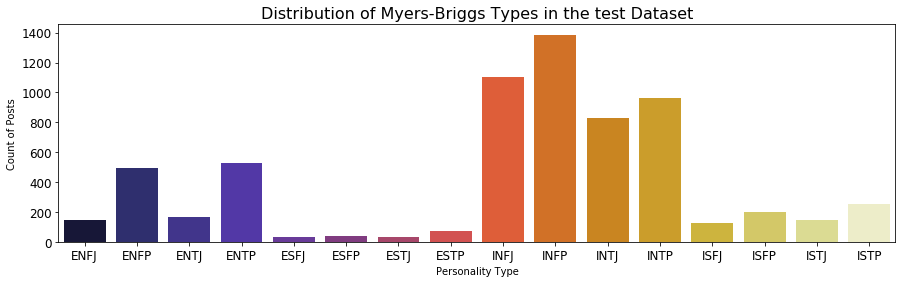

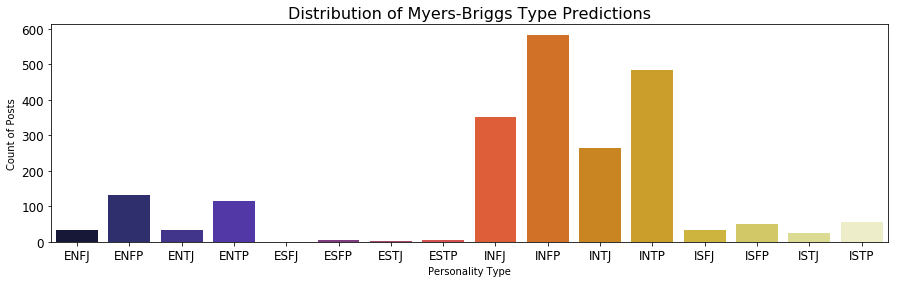

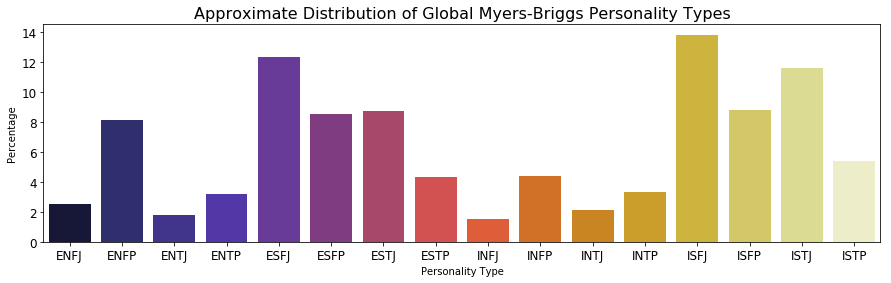

In [ ]:
#view posts count of each personality type
# Countplot of the 16 personality types in the dataset
dims1 = (15.0, 4.0)
fig, ax = plt.subplots(figsize=dims1)
cmrmap = sns.color_palette('CMRmap', 16)
sns.set_palette(cmrmap)
sns.countplot(x='type', data=train,\
              order=['ENFJ','ENFP','ENTJ','ENTP','ESFJ','ESFP','ESTJ','ESTP',\
                    'INFJ','INFP','INTJ','INTP','ISFJ','ISFP','ISTJ','ISTP'])
plt.title('Distribution of Myers-Briggs Types in the test Dataset', fontsize=16)
plt.xlabel('Personality Type')
plt.ylabel('Count of Posts')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



#view posts count of each personality type
# Countplot of the 16 personality types in the dataset
dims1 = (15.0, 4.0)
fig, ax = plt.subplots(figsize=dims1)
cmrmap = sns.color_palette("CMRmap", 16)
sns.set_palette(cmrmap)
sns.countplot(x='Personality Pred', data=my_submission,\
              order=['ENFJ','ENFP','ENTJ','ENTP','ESFJ','ESFP','ESTJ','ESTP',\
                    'INFJ','INFP','INTJ','INTP','ISFJ','ISFP','ISTJ','ISTP'])
plt.title('Distribution of Myers-Briggs Type Predictions', fontsize=16)
plt.xlabel('Personality Type')
plt.ylabel('Count of Posts')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



#view posts count of each personality type
# Countplot of the 16 personality types in the dataset
dims1 = (15.0, 4.0)
fig, ax = plt.subplots(figsize=dims1)
cmrmap = sns.color_palette("CMRmap", 16)
sns.set_palette(cmrmap)
sns.barplot(x='Type', y='Percentage', data=global_df, order=['ENFJ','ENFP','ENTJ','ENTP','ESFJ','ESFP','ESTJ','ESTP',\
                   'INFJ','INFP','INTJ','INTP','ISFJ','ISFP','ISTJ','ISTP'])
plt.title('Approximate Distribution of Global Myers-Briggs Personality Types', fontsize=16)
plt.xlabel('Personality Type')
plt.ylabel('Percentage')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


